<a href="https://colab.research.google.com/github/2403A51L03/2403A51L03_B51_P_DS/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies (uncomment if needed)
# !pip install scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# Load dataset
csv_path = "/content/GlobalLandTemperaturesByState.csv"  # change if needed
df = pd.read_csv(csv_path)

print("✅ Dataset loaded")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded
Shape: (645675, 5)


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
# Convert date column
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year

# Drop missing temperature values
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Binary target: 1 = HighTemp, 0 = LowTemp
threshold = df['AverageTemperature'].mean()
df['Target'] = np.where(df['AverageTemperature'] > threshold + df['AverageTemperatureUncertainty'], 1, 0)

# Encode categorical features
le_country = LabelEncoder()
le_state = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['State'] = le_state.fit_transform(df['State'])

print("✅ Preprocessing done")
df.head()


✅ Preprocessing done


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,year,Target
0,1855-05-01,25.544,1.171,0,1,1855,1
1,1855-06-01,24.228,1.103,0,1,1855,1
2,1855-07-01,24.371,1.044,0,1,1855,1
3,1855-08-01,25.427,1.073,0,1,1855,1
4,1855-09-01,25.675,1.014,0,1,1855,1


In [ ]:
# Features & Target
X = df[['AverageTemperature', 'AverageTemperatureUncertainty', 'year', 'Country', 'State']]
y = df['Target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Features scaled and split")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


✅ Features scaled and split
Training samples: 496021, Test samples: 124006


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Bagging": BaggingClassifier(n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": MLPClassifier(max_iter=500),
    "Extra Trees": ExtraTreesClassifier(n_jobs=-1)
}

print("✅ Models defined")


✅ Models defined


In [ ]:
for name, model in models.items():
    print("="*60)
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Training: Logistic Regression
Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59106
           1       1.00      1.00      1.00     64900

    accuracy                           1.00    124006
   macro avg       1.00      1.00      1.00    124006
weighted avg       1.00      1.00      1.00    124006

Training: Decision Tree
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59106
           1       1.00      1.00      1.00     64900

    accuracy                           1.00    124006
   macro avg       1.00      1.00      1.00    124006
weighted avg       1.00      1.00      1.00    124006

Training: Random Forest
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59106
           1       1.00      1.00      1.00     64900

    accuracy                       

In [ ]:
# =========================================
# 📌 Part 1: Setup & Imports + Data Preprocessing
# =========================================

# Install required packages (only in Colab, skip if running locally)
#!pip install torch scikit-learn pandas matplotlib seaborn --quiet

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path="/content/GlobalLandTemperaturesByState.csv"

# ✅ Efficient Data Loader
def load_and_prepare_colab(path_csv, max_rows=200_000):
    # Load CSV in chunks for efficiency
    chunk_size = 50_000
    chunks = []
    for i, chunk in enumerate(pd.read_csv(path_csv, chunksize=chunk_size)):
        chunks.append(chunk)
        print(f"✅ Loaded {(i+1)*chunk_size} rows so far...")
        if (i+1)*chunk_size >= max_rows:
            print(f"⚠️ Stopping early at {max_rows} rows for Colab efficiency.")
            break
    df = pd.concat(chunks, ignore_index=True)
    print(f"Final dataset shape: {df.shape}")

    # Convert datetime
    df['dt'] = pd.to_datetime(df['dt'])
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month

    # Drop rows with missing essential columns
    df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty', 'State', 'Country'])

    # Encode locations (categorical)
    le_state = LabelEncoder()
    le_country = LabelEncoder()
    df['StateEnc'] = le_state.fit_transform(df['State'].astype(str))
    df['CountryEnc'] = le_country.fit_transform(df['Country'].astype(str))

    # Climatology baseline
    base = df.groupby(['State', 'month'])['AverageTemperature'].mean().rename('StateMonthMean').reset_index()
    df = df.merge(base, on=['State', 'month'], how='left')
    df['StateMonthMean'] = df['StateMonthMean'].fillna(df.groupby('month')['AverageTemperature'].transform('mean'))

    # Anomalies
    df['anom'] = df['AverageTemperature'] - df['StateMonthMean']
    df['u_anom'] = df['anom'] - df['AverageTemperatureUncertainty']

    # Risk label
    tau_watch = df['u_anom'].quantile(0.65)
    tau_warn  = df['u_anom'].quantile(0.85)
    df['risk_label'] = df['u_anom'].apply(lambda u: 2 if u >= tau_warn else 1 if u >= tau_watch else 0)

    # Cyclical & normalized time features
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)
    y_min, y_max = df['year'].min(), df['year'].max()
    df['year_z'] = (df['year'] - y_min) / max(1, (y_max - y_min))

    # Feature matrix: scale only numeric features, keep categorical intact
    feat_cols = ['anom', 'AverageTemperatureUncertainty', 'month_sin', 'month_cos', 'year_z', 'StateEnc', 'CountryEnc']
    scaler = StandardScaler()
    df[feat_cols[:5]] = scaler.fit_transform(df[feat_cols[:5]])  # scale only first 5 numeric columns

    # Sort for sequential stepping
    df = df.sort_values(['StateEnc', 'dt']).reset_index(drop=True)
    print(f"Feature matrix shape after scaling: {df[feat_cols].shape}")

    return df, feat_cols


In [ ]:
# =========================================
# 📌 Part 2: ClimateAlertEnv (Gym-like)
# =========================================

import random
from typing import Optional

class ClimateAlertEnv:
    """
    Gym-like environment for climate alerts.
    Observations: feature vector (anom, uncertainty, month_sin, month_cos, year_z, StateEnc, CountryEnc)
    Actions: 0 = No Alert, 1 = Watch, 2 = Warning
    Rewards: +1 correct, -0.2 for close, -1 for wrong, scaled by certainty
    """

    def __init__(self, df: pd.DataFrame, feat_cols):
        self.df = df
        self.feat_cols = feat_cols
        self.action_space_n = 3

        # indices per state for episodes
        self.by_state = {s: idx.values for s, idx in df.groupby('StateEnc').groups.items()}
        self.states_list = list(self.by_state.keys())
        self.current_indices = None
        self.ptr = 0
        self.current_state_enc = None
        self.obs = None

    def reset(self, state_choice: Optional[int] = None):
        # choose state
        self.current_state_enc = state_choice if state_choice is not None else random.choice(self.states_list)
        self.current_indices = self.by_state[self.current_state_enc]

        if len(self.current_indices) < 3:  # too short, pick another
            return self.reset()

        self.ptr = 0
        return self._get_obs()

    def _get_obs(self):
        row = self.df.iloc[self.current_indices[self.ptr]]
        self.obs = row[self.feat_cols].values.astype(np.float32)
        return self.obs

    def step(self, action: int):
        row = self.df.iloc[self.current_indices[self.ptr]]
        true_label = int(row['risk_label'])
        uncert = float(abs(row['AverageTemperatureUncertainty']))
        certainty = 1.0 / (1.0 + uncert)  # lower uncertainty -> higher certainty

        # Reward shaping
        if action == true_label:
            reward = 1.0 * (0.5 + 0.5*certainty)
        elif abs(action - true_label) == 1:
            reward = -0.2 * (0.5 + 0.5*certainty)
        else:
            reward = -1.0 * (0.5 + 0.5*certainty)

        # Advance pointer
        self.ptr += 1
        done = self.ptr >= (len(self.current_indices) - 1)
        obs_next = self._get_obs() if not done else None
        info = {'true_label': true_label, 'uncertainty': uncert}
        return obs_next, reward, done, info


In [ ]:
# =========================================
# 📌 Part 3: Discretizer + QTableAgent (Tabular RL)
# =========================================

from collections import defaultdict

# ----- Discretizer for continuous features -----
class Discretizer:
    """
    Uniform binning on selected continuous features to build a tabular state key.
    """
    def __init__(self, bounds: dict, bins: int = 6):
        """
        bounds: dict {feature_index: (min, max)}
        bins: number of bins per feature
        """
        self.bounds = bounds
        self.bins = bins

    def encode(self, obs: np.ndarray) -> tuple:
        key = []
        for i, (lo, hi) in self.bounds.items():
            x = float(obs[i])
            x = max(min(x, hi), lo)  # clamp
            idx = int((x - lo) / max(1e-9, (hi - lo)) * self.bins)
            if idx == self.bins: idx -= 1
            key.append(idx)
        return tuple(key)


# ----- Tabular Q-Learning / SARSA Agent -----
class QTableAgent:
    """
    Tabular RL agent supporting Q-Learning or SARSA
    """
    def __init__(self, n_actions, discretizer: Discretizer, alpha=0.2, gamma=0.95, eps=0.1, sarsa=False):
        self.n_actions = n_actions
        self.Q = defaultdict(lambda: np.zeros(n_actions, dtype=np.float32))
        self.dz = discretizer
        self.alpha, self.gamma, self.eps = alpha, gamma, eps
        self.sarsa = sarsa

    def policy(self, s_key):
        if random.random() < self.eps:
            return random.randrange(self.n_actions)
        return int(np.argmax(self.Q[s_key]))

    def update(self, s_key, a, r, s_next_key=None, a_next=None, done=False):
        q_sa = self.Q[s_key][a]
        if done or s_next_key is None:
            target = r
        else:
            if self.sarsa and a_next is not None:
                target = r + self.gamma * self.Q[s_next_key][a_next]
            else:
                target = r + self.gamma * np.max(self.Q[s_next_key])
        self.Q[s_key][a] += self.alpha * (target - q_sa)


In [ ]:
# =========================================
# 📌 Part 4: Contextual Bandits (LinearBandit)
# =========================================

import math

class LinearBandit:
    """
    Contextual bandit with multiple modes:
    - 'egreedy': epsilon-greedy linear
    - 'linucb': LinUCB exploration bonus
    - 'thompson': Thompson Sampling with linear model
    """

    def __init__(self, n_actions, d, mode='egreedy', eps=0.1, alpha=1.0, v=1.0):
        """
        n_actions: number of actions
        d: feature dimension
        mode: 'egreedy', 'linucb', 'thompson'
        eps: for e-greedy
        alpha: for LinUCB
        v: variance for Thompson
        """
        self.n_actions, self.d = n_actions, d
        self.mode, self.eps, self.alpha, self.v = mode, eps, alpha, v

        # Per-action linear model: A (dxd) and b (dx1)
        self.A = [np.eye(d) for _ in range(n_actions)]
        self.b = [np.zeros((d,1)) for _ in range(n_actions)]

    def _theta(self, a):
        A_inv = np.linalg.inv(self.A[a])
        theta = A_inv @ self.b[a]
        return theta, A_inv

    def select(self, x):
        x = x.reshape(-1,1)
        if self.mode == 'egreedy' and random.random() < self.eps:
            return random.randrange(self.n_actions)

        vals = []
        for a in range(self.n_actions):
            theta, A_inv = self._theta(a)
            mean = (theta.T @ x).item()

            if self.mode == 'linucb':
                bonus = self.alpha * math.sqrt((x.T @ A_inv @ x).item())
                vals.append(mean + bonus)
            elif self.mode == 'thompson':
                try:
                    cov = (self.v**2) * A_inv
                    sample_theta = np.random.multivariate_normal(theta.flatten(), cov)
                    vals.append(float(sample_theta @ x.flatten()))
                except np.linalg.LinAlgError:
                    vals.append(mean)
            else:
                vals.append(mean)

        return int(np.argmax(vals))

    def update(self, a, x, r):
        x = x.reshape(-1,1)
        self.A[a] += x @ x.T
        self.b[a] += r * x


In [ ]:
# =========================================
# 📌 Part 5: Deep RL (DQN, REINFORCE, A2C)
# =========================================

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    TORCH_AVAILABLE = True
except ImportError:
    TORCH_AVAILABLE = False
    print("PyTorch not available — Deep RL will be skipped.")

from collections import deque
import random
import numpy as np

# ----- Helper: simple MLP -----
def make_mlp(in_dim, out_dim, hidden=(128,128)):
    return nn.Sequential(
        nn.Linear(in_dim, hidden[0]), nn.ReLU(),
        nn.Linear(hidden[0], hidden[1]), nn.ReLU(),
        nn.Linear(hidden[1], out_dim)
    )

# ----- DQN Agent -----
class DQNAgent:
    def __init__(self, obs_dim, n_actions, lr=1e-3, gamma=0.99, eps=0.1):
        self.n_actions, self.gamma, self.eps = n_actions, gamma, eps
        self.q = make_mlp(obs_dim, n_actions)
        self.q_target = make_mlp(obs_dim, n_actions)
        self.q_target.load_state_dict(self.q.state_dict())
        self.opt = optim.Adam(self.q.parameters(), lr=lr)
        self.buffer = deque(maxlen=50000)
        self.batch = 128
        self.steps = 0
        self.sync = 500

    def act(self, obs):
        if random.random() < self.eps:
            return random.randrange(self.n_actions)
        with torch.no_grad():
            q_vals = self.q(torch.from_numpy(obs).float().unsqueeze(0))
            return int(torch.argmax(q_vals, dim=1).item())

    def push(self, s, a, r, s2, done):
        self.buffer.append((s, a, r, s2, done))

    def train_step(self):
        if len(self.buffer) < self.batch:
            return
        batch = random.sample(self.buffer, self.batch)
        s, a, r, s2, d = zip(*batch)
        s  = torch.tensor(np.stack(s), dtype=torch.float32)
        a  = torch.tensor(a, dtype=torch.int64).unsqueeze(1)
        r  = torch.tensor(r, dtype=torch.float32).unsqueeze(1)
        d  = torch.tensor(d, dtype=torch.float32).unsqueeze(1)
        s2_tensor = []
        for x in s2:
            if x is None:
                s2_tensor.append(np.zeros_like(s[0].numpy()))
            else:
                s2_tensor.append(x)
        s2 = torch.tensor(np.stack(s2_tensor), dtype=torch.float32)

        q_vals = self.q(s).gather(1, a)
        with torch.no_grad():
            next_q = self.q_target(s2).max(1, keepdim=True)[0]
            target = r + (1 - d) * self.gamma * next_q

        loss = nn.MSELoss()(q_vals, target)
        self.opt.zero_grad(); loss.backward(); self.opt.step()
        self.steps += 1
        if self.steps % self.sync == 0:
            self.q_target.load_state_dict(self.q.state_dict())


# ----- REINFORCE Agent -----
class REINFORCEAgent:
    def __init__(self, obs_dim, n_actions, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.n_actions = n_actions
        self.pi = nn.Sequential(
            nn.Linear(obs_dim, 128), nn.ReLU(),
            nn.Linear(128, n_actions), nn.Softmax(dim=-1)
        )
        self.opt = optim.Adam(self.pi.parameters(), lr=lr)
        self.traj = []

    def act(self, obs):
        with torch.no_grad():
            p = self.pi(torch.from_numpy(obs).float().unsqueeze(0))
        a = torch.distributions.Categorical(p).sample().item()
        return a

    def remember(self, s, a, r):
        self.traj.append((s, a, r))

    def train_step(self):
        R = 0.0
        returns = []
        for _, _, r in reversed(self.traj):
            R = r + self.gamma * R
            returns.append(R)
        returns = list(reversed(returns))
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-9)

        logps = []
        for (s, a, _), Gt in zip(self.traj, returns):
            p = self.pi(torch.from_numpy(s).float().unsqueeze(0))
            dist = torch.distributions.Categorical(p)
            logps.append(dist.log_prob(torch.tensor(a)) * Gt)
        loss = -torch.stack(logps).sum()

        self.opt.zero_grad(); loss.backward(); self.opt.step()
        self.traj = []


# ----- A2C Agent -----
class A2CAgent:
    def __init__(self, obs_dim, n_actions, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.actor = nn.Sequential(
            nn.Linear(obs_dim, 128), nn.ReLU(),
            nn.Linear(128, n_actions), nn.Softmax(dim=-1)
        )
        self.critic = nn.Sequential(
            nn.Linear(obs_dim, 128), nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.optA = optim.Adam(self.actor.parameters(), lr=lr)
        self.optC = optim.Adam(self.critic.parameters(), lr=lr)

    def act(self, obs):
        with torch.no_grad():
            p = self.actor(torch.from_numpy(obs).float().unsqueeze(0))
        return torch.distributions.Categorical(p).sample().item()

    def train_step(self, s, a, r, s2, done):
        s  = torch.from_numpy(s).float().unsqueeze(0)
        v  = self.critic(s)
        v2 = torch.tensor([[0.0]]) if done or s2 is None else self.critic(torch.from_numpy(s2).float().unsqueeze(0)).detach()
        td_target = torch.tensor([[r]]) + self.gamma * v2
        adv = td_target - v

        # Critic loss
        loss_c = adv.pow(2).mean()
        self.optC.zero_grad(); loss_c.backward(); self.optC.step()

        # Actor loss
        p = self.actor(s)
        dist = torch.distributions.Categorical(p)
        loss_a = -dist.log_prob(torch.tensor(a)) * adv.detach()
        self.optA.zero_grad(); loss_a.backward(); self.optA.step()


In [ ]:
# =========================================
# 📌 Part 6: Training Loops + Evaluation
# =========================================

# ---------- Tabular RL Training ----------
def train_tabular(env, discretizer, algo='qlearning', episodes=500, max_steps=200):
    agent = QTableAgent(env.action_space_n, discretizer,
                        alpha=0.2, gamma=0.97, eps=0.1,
                        sarsa=(algo.lower()=='sarsa'))
    rewards = []
    for ep in range(episodes):
        obs = env.reset()
        s_key = discretizer.encode(obs)
        a = agent.policy(s_key)
        ep_r = 0.0
        for t in range(max_steps):
            obs2, r, done, _ = env.step(a)
            ep_r += r
            if done or obs2 is None:
                agent.update(s_key, a, r, None, None, True)
                break
            s2_key = discretizer.encode(obs2)
            if agent.sarsa:
                a2 = agent.policy(s2_key)
                agent.update(s_key, a, r, s2_key, a2, False)
                s_key, a = s2_key, a2
            else:
                agent.update(s_key, a, r, s2_key, None, False)
                s_key, a = s2_key, agent.policy(s2_key)
        rewards.append(ep_r)
        if (ep+1) % 100 == 0:
            print(f"[{algo.upper()}] Episode {ep+1}/{episodes} | Return: {ep_r:.2f}")
    return agent, rewards


# ---------- Bandit Training ----------
def train_bandit(env, feat_dim, mode='linucb', episodes=500, horizon=200):
    bandit = LinearBandit(env.action_space_n, feat_dim, mode=mode, eps=0.1, alpha=1.0, v=0.5)
    rewards = []
    for ep in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            a = bandit.select(obs.copy())
            obs2, r, done, _ = env.step(a)
            bandit.update(a, obs.copy(), r)
            ep_r += r
            if done or obs2 is None: break
            obs = obs2
        rewards.append(ep_r)
        if (ep+1) % 100 == 0:
            print(f"[{mode.upper()}] Episode {ep+1}/{episodes} | Return: {ep_r:.2f}")
    return bandit, rewards


# ---------- Deep RL Training ----------
def train_dqn(env, episodes=200, horizon=200):
    if not TORCH_AVAILABLE:
        print("Torch not available — skipping DQN")
        return None, []
    obs_dim = len(env._get_obs())
    agent = DQNAgent(obs_dim, env.action_space_n)
    returns = []
    for ep in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            a = agent.act(obs)
            obs2, r, done, _ = env.step(a)
            agent.push(obs, a, r, np.zeros_like(obs) if obs2 is None else obs2, done)
            agent.train_step()
            ep_r += r
            if done: break
            obs = obs2
        returns.append(ep_r)
        if (ep+1) % 50 == 0:
            print(f"[DQN] Episode {ep+1}/{episodes} | Return: {ep_r:.2f}")
    return agent, returns


def train_reinforce(env, episodes=200, horizon=200):
    if not TORCH_AVAILABLE:
        print("Torch not available — skipping REINFORCE")
        return None, []
    obs_dim = len(env._get_obs())
    agent = REINFORCEAgent(obs_dim, env.action_space_n)
    returns = []
    for ep in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            a = agent.act(obs)
            obs2, r, done, _ = env.step(a)
            agent.remember(obs, a, r)
            ep_r += r
            if done: break
            obs = obs2
        agent.train_step()
        returns.append(ep_r)
        if (ep+1) % 50 == 0:
            print(f"[REINFORCE] Episode {ep+1}/{episodes} | Return: {ep_r:.2f}")
    return agent, returns


def train_a2c(env, episodes=200, horizon=200):
    if not TORCH_AVAILABLE:
        print("Torch not available — skipping A2C")
        return None, []
    obs_dim = len(env._get_obs())
    agent = A2CAgent(obs_dim, env.action_space_n)
    returns = []
    for ep in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            a = agent.act(obs)
            obs2, r, done, _ = env.step(a)
            agent.train_step(obs, a, r, obs2, done)
            ep_r += r
            if done: break
            obs = obs2
        returns.append(ep_r)
        if (ep+1) % 50 == 0:
            print(f"[A2C] Episode {ep+1}/{episodes} | Return: {ep_r:.2f}")
    return agent, returns


# ---------- Evaluation Functions ----------
def eval_tabular(agent, env, discretizer, episodes=50, max_steps=200):
    total = 0.0
    for _ in range(episodes):
        obs = env.reset()
        s_key = discretizer.encode(obs)
        ep_r = 0.0
        for t in range(max_steps):
            a = int(np.argmax(agent.Q[s_key]))
            obs2, r, done, _ = env.step(a)
            ep_r += r
            if done or obs2 is None: break
            s_key = discretizer.encode(obs2)
        total += ep_r
    return total / episodes


def eval_bandit(bandit, env, episodes=50, horizon=200):
    total = 0.0
    for _ in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            a = bandit.select(obs.copy())
            obs2, r, done, _ = env.step(a)
            ep_r += r
            if done or obs2 is None: break
            obs = obs2
        total += ep_r
    return total / episodes


def eval_drl(agent, env, episodes=20, horizon=200, kind='dqn'):
    total = 0.0
    for _ in range(episodes):
        obs = env.reset()
        ep_r = 0.0
        for t in range(horizon):
            with torch.no_grad():
                if kind == 'dqn':
                    q = agent.q(torch.from_numpy(obs).float().unsqueeze(0))
                    a = int(torch.argmax(q, 1).item())
                else:  # A2C or REINFORCE
                    p = agent.actor(torch.from_numpy(obs).float().unsqueeze(0))
                    a = int(torch.argmax(p, 1).item())
            obs2, r, done, _ = env.step(a)
            ep_r += r
            if done or obs2 is None: break
            obs = obs2
        total += ep_r
    return total / episodes


In [ ]:
# =========================================
# 📌 Part 7: Main Script (Colab-Ready)
# =========================================

import random

# --------- 1) Set CSV Path ---------
csv_path = "/content/GlobalLandTemperaturesByState.csv"

import io

# --------- 2) Load & Prepare Data ---------
df, feat_cols = load_and_prepare_colab(csv_path)

# --------- 3) Split Train/Test States ---------
unique_states = df['StateEnc'].unique()
random.shuffle(unique_states.tolist())
split = int(0.8 * len(unique_states))
train_states = set(unique_states[:split])
test_states  = set(unique_states[split:])

train_df = df[df['StateEnc'].isin(train_states)].reset_index(drop=True)
test_df  = df[df['StateEnc'].isin(test_states)].reset_index(drop=True)

env_train = ClimateAlertEnv(train_df, feat_cols)
env_test  = ClimateAlertEnv(test_df, feat_cols)

# --------- 4) Tabular Discretizer ---------
idx_map = {c:i for i,c in enumerate(feat_cols)}
bounds = {
    idx_map['anom']: (-2.5, 2.5),
    idx_map['AverageTemperatureUncertainty']: (-2.5, 2.5),
    idx_map['year_z']: (-2.0, 2.0),
}
disc = Discretizer(bounds, bins=8)

# --------- 5) Train Tabular RL ---------
q_agent, q_returns = train_tabular(env_train, disc, algo='qlearning', episodes=500)
sarsa_agent, sarsa_returns = train_tabular(env_train, disc, algo='sarsa', episodes=500)

# --------- 6) Train Contextual Bandits ---------
bandit_linucb, linucb_returns = train_bandit(env_train, feat_dim=len(feat_cols), mode='linucb', episodes=500)
bandit_thomp, thomp_returns  = train_bandit(env_train, feat_dim=len(feat_cols), mode='thompson', episodes=500)

# --------- 7) Train Deep RL (if Torch available) ---------
if TORCH_AVAILABLE:
    dqn_agent, dqn_returns = train_dqn(env_train, episodes=200)
    reinf_agent, reinf_returns = train_reinforce(env_train, episodes=200)
    a2c_agent, a2c_returns = train_a2c(env_train, episodes=200)

# --------- 8) Final Evaluation ---------
print("\n=== TEST EVALUATION (Average Return) ===")
print("Q-Learning:", eval_tabular(q_agent, env_test, disc))
print("SARSA:", eval_tabular(sarsa_agent, env_test, disc))
print("LinUCB:", eval_bandit(bandit_linucb, env_test))
print("Thompson:", eval_bandit(bandit_thomp, env_test))

if TORCH_AVAILABLE:
    print("DQN:", eval_drl(dqn_agent, env_test, kind='dqn'))
    print("A2C:", eval_drl(a2c_agent, env_test, kind='a2c'))


✅ Loaded 50000 rows so far...
✅ Loaded 100000 rows so far...
✅ Loaded 150000 rows so far...
✅ Loaded 200000 rows so far...
⚠️ Stopping early at 200000 rows for Colab efficiency.
Final dataset shape: (200000, 5)
Feature matrix shape after scaling: (192827, 7)
[QLEARNING] Episode 100/500 | Return: 122.52
[QLEARNING] Episode 200/500 | Return: 121.39
[QLEARNING] Episode 300/500 | Return: 137.67
[QLEARNING] Episode 400/500 | Return: 149.30
[QLEARNING] Episode 500/500 | Return: 121.97
[SARSA] Episode 100/500 | Return: 103.38
[SARSA] Episode 200/500 | Return: 150.55
[SARSA] Episode 300/500 | Return: 131.04
[SARSA] Episode 400/500 | Return: 110.84
[SARSA] Episode 500/500 | Return: 125.23
[LINUCB] Episode 100/500 | Return: 165.42
[LINUCB] Episode 200/500 | Return: 177.72
[LINUCB] Episode 300/500 | Return: 132.69
[LINUCB] Episode 400/500 | Return: 117.52
[LINUCB] Episode 500/500 | Return: 124.08
[THOMPSON] Episode 100/500 | Return: 128.22
[THOMPSON] Episode 200/500 | Return: 131.97
[THOMPSON] Ep

In [7]:
# Install dependencies if needed
# !pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [8]:
# Load dataset (uploaded to Colab files)
df = pd.read_csv("/content/GlobalLandTemperaturesByState.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
# Convert date and extract year
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year

# Drop missing values for clustering
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Encode categorical features
le_country = LabelEncoder()
le_state = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['State'] = le_state.fit_transform(df['State'])

# Features for unsupervised learning
X = df[['AverageTemperature', 'AverageTemperatureUncertainty', 'year', 'Country', 'State']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix shape after scaling:", X_scaled.shape)


Feature matrix shape after scaling: (620027, 5)


In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
print("KMeans clustering done. Cluster counts:\n", df['KMeans_Cluster'].value_counts())

KMeans clustering done. Cluster counts:
 KMeans_Cluster
0    169230
3    155731
2    148119
1    146947
Name: count, dtype: int64


In [ ]:
hier = AgglomerativeClustering(n_clusters=4)
df['Hier_Cluster'] = hier.fit_predict(X_scaled)
print("Hierarchical clustering done. Cluster counts:\n", df['Hier_Cluster'].value_counts())


In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
print("DBSCAN clustering done. Unique clusters:", df['DBSCAN_Cluster'].unique())


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)
print("GMM clustering done. Cluster counts:\n", df['GMM_Cluster'].value_counts())


GMM clustering done. Cluster counts:
 GMM_Cluster
1    232984
0    177434
2    152481
3     57128
Name: count, dtype: int64


In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
print("PCA completed. Explained variance ratio:", pca.explained_variance_ratio_)


PCA completed. Explained variance ratio: [0.38638093 0.22004017]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


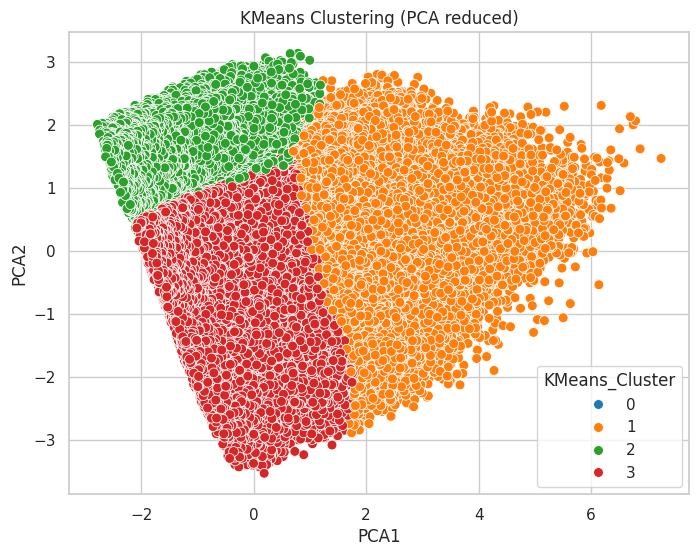

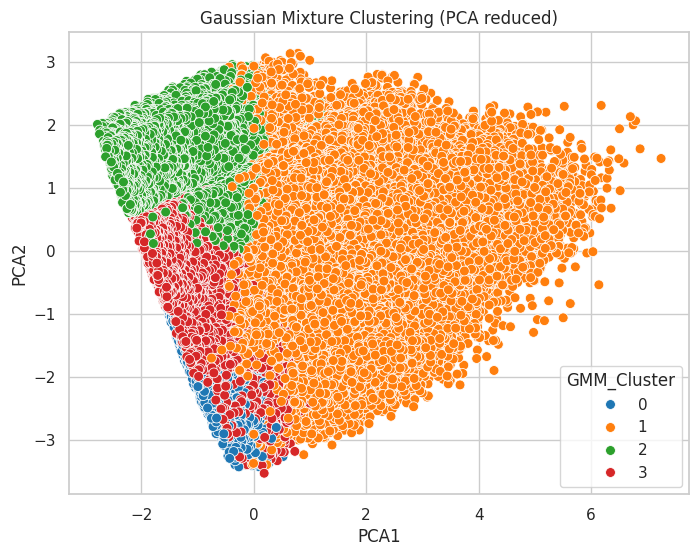

In [ ]:
# Function to plot clusters
def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=cluster_col, data=df, palette='tab10', s=50)
    plt.title(title)
    plt.show()

plot_clusters(df, 'KMeans_Cluster', "KMeans Clustering (PCA reduced)")
#plot_clusters(df, 'Hier_Cluster', "Hierarchical Clustering (PCA reduced)")
#plot_clusters(df, 'DBSCAN_Cluster', "DBSCAN Clustering (PCA reduced)")
plot_clusters(df, 'GMM_Cluster', "Gaussian Mixture Clustering (PCA reduced)")


In [ ]:
df[['AverageTemperature', 'AverageTemperatureUncertainty',
    'KMeans_Cluster', 'Hier_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster']].head()

In [ ]:
# Install dependencies if needed
# !pip install pandas numpy scikit-learn matplotlib torch

import os
import math
import random
from pathlib import Path
from typing import Tuple, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, accuracy_score

# -------------------------- User params ----------------------------------------
CSV_PATH = "/content/GlobalLandTemperaturesByState.csv"   # Uploaded CSV in Colab
TARGET_MODE = "regression"   # "regression" or "classification"
SEQ_LENGTH = 12              # use past 12 months to predict next month
BATCH_SIZE = 64
EPOCHS = 30
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
NUM_ENSEMBLE = 4            # for deep ensemble
DROPOUT_P = 0.2             # for MC Dropout

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
# -------------------------- Data preparation ----------------------------------
def load_prepare(csv_path: str) -> Tuple[pd.DataFrame, List[str]]:
    df = pd.read_csv(csv_path)
    df['dt'] = pd.to_datetime(df['dt'])
    df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty', 'State', 'Country'])
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month

    # compute state-month climatology baseline
    base = df.groupby(['State', 'month'])['AverageTemperature'].mean().rename('StateMonthMean').reset_index()
    df = df.merge(base, on=['State','month'], how='left')
    df['StateMonthMean'] = df['StateMonthMean'].fillna(df['AverageTemperature'].groupby(df['month']).transform('mean'))

    df['anom'] = df['AverageTemperature'] - df['StateMonthMean']
    df['u_anom'] = df['anom'] - df['AverageTemperatureUncertainty']  # uncertainty-aware anomaly

    # risk tiers for classification
    tau_watch = df['u_anom'].quantile(0.65)
    tau_warn  = df['u_anom'].quantile(0.85)
    def tier(u):
        if u >= tau_warn: return 2
        if u >= tau_watch: return 1
        return 0
    df['risk_label'] = df['u_anom'].apply(tier)

    # cyclical month features and normalized year
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)
    y_min, y_max = df['year'].min(), df['year'].max()
    df['year_z'] = (df['year'] - y_min) / max(1, y_max - y_min)

    # encode state/country
    le_state = LabelEncoder()
    le_country = LabelEncoder()
    df['StateEnc'] = le_state.fit_transform(df['State'].astype(str))
    df['CountryEnc'] = le_country.fit_transform(df['Country'].astype(str))

    df = df.sort_values(['StateEnc','dt']).reset_index(drop=True)
    feature_cols = ['AverageTemperature','AverageTemperatureUncertainty','anom','u_anom',
                    'month_sin','month_cos','year_z','StateEnc','CountryEnc']
    return df, feature_cols

In [ ]:
# -------------------------- Sequence dataset ----------------------------------
class ClimateSeqDataset(Dataset):
    def __init__(self, df: pd.DataFrame, feature_cols: List[str], seq_len: int=12, target_mode: str="regression"):
        self.seq_len = seq_len
        self.feat = feature_cols
        self.target_mode = target_mode
        self.samples = []
        for s, grp in df.groupby('StateEnc'):
            arr = grp[self.feat].values.astype(np.float32)
            if len(arr) <= seq_len:
                continue
            for i in range(len(arr)-seq_len):
                X = arr[i:i+seq_len]
                if target_mode == "regression":
                    y = grp.iloc[i+seq_len]['AverageTemperature']
                else:
                    y = int(grp.iloc[i+seq_len]['risk_label'])
                self.samples.append((X,y))
        print(f"Built {len(self.samples)} sequence samples (seq_len={seq_len}) for mode={target_mode}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        X, y = self.samples[idx]
        X = torch.from_numpy(X)
        if self.target_mode == "regression":
            return X, torch.tensor(y, dtype=torch.float32)
        return X, torch.tensor(y, dtype=torch.long)


In [ ]:
# -------------------------- Scaler for regression targets ---------------------
def build_target_scaler(train_dataset):
    ys = np.array([y for _,y in train_dataset.samples], dtype=np.float32)
    mean, std = ys.mean(), ys.std() if ys.std()>0 else 1.0
    return mean, std


In [ ]:
# -------------------------- Models -------------------------------------------
class MLPReg(nn.Module):
    def __init__(self, in_features, hidden=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(),
            nn.Linear(hidden//2, 1)
        )
    def forward(self,x):
        B = x.shape[0]
        return self.net(x.view(B,-1)).squeeze(-1)

class CNN1D(nn.Module):
    def __init__(self, in_ch, out_dim=1):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(64,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(128, out_dim)
    def forward(self,x):
        x = x.permute(0,2,1)
        out = self.conv(x).squeeze(-1)
        out = self.fc(out)
        return out.squeeze(-1)

class RNNBase(nn.Module):
    def __init__(self, in_feat, hidden=64, num_layers=1, rnn_type='LSTM', out_dim=1):
        super().__init__()
        if rnn_type=='LSTM':
            self.rnn = nn.LSTM(in_feat, hidden, num_layers, batch_first=True)
        elif rnn_type=='GRU':
            self.rnn = nn.GRU(in_feat, hidden, num_layers, batch_first=True)
        else:
            raise ValueError("rnn_type must be LSTM or GRU")
        self.head = nn.Sequential(nn.Linear(hidden, hidden//2), nn.ReLU(), nn.Linear(hidden//2, out_dim))
    def forward(self,x):
        out, _ = self.rnn(x)
        last = out[:, -1, :]
        return self.head(last).squeeze(-1)

class TimeTransformer(nn.Module):
    def __init__(self, feat_dim, d_model=64, nhead=4, num_layers=2, out_dim=1):
        super().__init__()
        self.input_proj = nn.Linear(feat_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.head = nn.Sequential(nn.Linear(d_model, d_model//2), nn.ReLU(), nn.Linear(d_model//2, out_dim))
    def forward(self,x):
        x = self.input_proj(x)
        enc = self.encoder(x)
        last = enc[:, -1, :]
        return self.head(last).squeeze(-1)

class TCN(nn.Module):
    def __init__(self, in_ch, out_dim=1, num_levels=3, hidden=64):
        super().__init__()
        layers = []
        for i in range(num_levels):
            dilation = 2**i
            layers.append(nn.Conv1d(in_ch if i==0 else hidden, hidden, kernel_size=3, padding=dilation, dilation=dilation))
            layers.append(nn.ReLU())
        self.net = nn.Sequential(*layers, nn.AdaptiveAvgPool1d(1))
        self.fc = nn.Linear(hidden, out_dim)
    def forward(self,x):
        x = x.permute(0,2,1)
        out = self.net(x).squeeze(-1)
        return self.fc(out).squeeze(-1)


In [ ]:
# -------------------------- Training utilities -------------------------------
def train_epoch(model, loader, opt, loss_fn, device=DEVICE, target_mode="regression", y_mean=0.0, y_std=1.0):
    model.train()
    total_loss = 0.0
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        if target_mode == "regression":
            y = ((y_batch - y_mean) / y_std).to(device).float()
        else:
            y = y_batch.to(device).long()
        opt.zero_grad()
        preds = model(X_batch)
        loss = loss_fn(preds, y)
        loss.backward()
        opt.step()
        total_loss += loss.item() * X_batch.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, device=DEVICE, target_mode="regression", y_mean=0.0, y_std=1.0, mc_dropout=False, mc_iters=10):
    model.eval()
    preds_all, ys_all = [], []
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        if target_mode=="regression":
            if mc_dropout:
                model.train()
                mc_preds = []
                with torch.no_grad():
                    for _ in range(mc_iters):
                        mc_preds.append(model(X_batch).cpu().numpy())
                preds_all.extend(np.mean(mc_preds, axis=0).tolist())
                model.eval()
            else:
                with torch.no_grad():
                    preds_all.extend(model(X_batch).cpu().numpy().tolist())
            ys_all.extend([y for y in y_batch.numpy()])
        else:
            with torch.no_grad():
                logits = model(X_batch).cpu().numpy()
            preds_all.extend(np.argmax(logits, axis=1).tolist())
            ys_all.extend([int(y) for y in y_batch.numpy()])

    if target_mode=="regression":
        preds_all = np.array(preds_all).squeeze()
        ys_all = np.array(ys_all)
        preds_orig = preds_all * y_std + y_mean
        mse = mean_squared_error(ys_all, preds_orig)
        mae = mean_absolute_error(ys_all, preds_orig)
        return {"mse": mse, "mae": mae, "preds": preds_orig, "ys": ys_all}
    else:
        print(classification_report(ys_all, preds_all))
        return {"accuracy": accuracy_score(ys_all, preds_all)}


In [ ]:
# -------------------------- Model factory ------------------------------------
def build_model(kind: str, in_seq_len: int, feat_dim: int, dropout=DROPOUT_P):
    if kind == "mlp":
        return MLPReg(in_seq_len * feat_dim, hidden=128, dropout=dropout).to(DEVICE)
    elif kind == "cnn1d":
        return CNN1D(feat_dim, out_dim=1).to(DEVICE)
    elif kind == "lstm":
        return RNNBase(feat_dim, hidden=128, rnn_type='LSTM', out_dim=1).to(DEVICE)
    elif kind == "gru":
        return RNNBase(feat_dim, hidden=128, rnn_type='GRU', out_dim=1).to(DEVICE)
    elif kind == "transformer":
        return TimeTransformer(feat_dim, d_model=64, nhead=4, num_layers=2, out_dim=1).to(DEVICE)
    elif kind == "tcn":
        return TCN(feat_dim, out_dim=1, num_levels=3, hidden=64).to(DEVICE)
    else:
        raise ValueError(f"Unknown model kind: {kind}")


In [ ]:
# -------------------------- Training harness ---------------------------------
def run_training(kind: str, train_loader, test_loader, target_mode="regression", epochs=EPOCHS, y_mean=0.0, y_std=1.0, mc_dropout=False):
    print(f"\n=== Training {kind} (target_mode={target_mode}) ===")
    feat_dim = next(iter(train_loader))[0].shape[2]
    seq_len = next(iter(train_loader))[0].shape[1]
    model = build_model(kind, seq_len, feat_dim)
    loss_fn = nn.MSELoss() if target_mode=="regression" else nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters(), lr=LR)
    for ep in range(1, epochs+1):
        loss = train_epoch(model, train_loader, opt, loss_fn, device=DEVICE, target_mode=target_mode, y_mean=y_mean, y_std=y_std)
        if ep % max(1, epochs//5) == 0 or ep==1:
            print(f"[{kind}] Epoch {ep}/{epochs} | train_loss={loss:.6f}")
    metrics = evaluate(model, test_loader, device=DEVICE, target_mode=target_mode, y_mean=y_mean, y_std=y_std, mc_dropout=mc_dropout)
    print(f"[{kind}] Evaluation -> {metrics}\n")
    return model, metrics

def train_ensemble(kind: str, n_models: int, train_loader, test_loader, target_mode="regression", y_mean=0.0, y_std=1.0):
    ensemble, metrics_list = [], []
    for i in range(n_models):
        torch.manual_seed(SEED + i)
        model, metrics = run_training(kind, train_loader, test_loader, target_mode=target_mode, epochs=max(8,EPOCHS//2), y_mean=y_mean, y_std=y_std, mc_dropout=False)
        ensemble.append(model)
        metrics_list.append(metrics)
    return ensemble, metrics_list


In [ ]:
# -------------------------- Main experiment (Colab-friendly) ------------------
if __name__ == "__main__":
    if not Path(CSV_PATH).exists():
        raise FileNotFoundError(f"CSV file not found at {CSV_PATH}. Change CSV_PATH to your dataset.")

    # 1) Load and prepare dataset
    df, FEATURE_COLS = load_prepare(CSV_PATH)
    print(f"Loaded {len(df)} rows. Features: {FEATURE_COLS}")

    # 2) Split by states to reduce leakage (80/20)
    states = df['StateEnc'].unique()
    random.shuffle(states.tolist())
    split = int(0.8 * len(states))
    train_states = set(states[:split])
    test_states  = set(states[split:])
    train_df = df[df['StateEnc'].isin(train_states)].reset_index(drop=True)
    test_df  = df[df['StateEnc'].isin(test_states)].reset_index(drop=True)

    # 3) Build sequence datasets and loaders
    train_ds = ClimateSeqDataset(train_df, FEATURE_COLS, seq_len=SEQ_LENGTH, target_mode=TARGET_MODE)
    test_ds  = ClimateSeqDataset(test_df, FEATURE_COLS, seq_len=SEQ_LENGTH, target_mode=TARGET_MODE)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

    if TARGET_MODE == "regression":
        y_mean, y_std = build_target_scaler(train_ds)
    else:
        y_mean, y_std = 0.0, 1.0

    print(f"Train samples: {len(train_ds)}, Test samples: {len(test_ds)}")

    # ------------------ 4) Train and evaluate all models ------------------
    model_kinds = ["mlp", "lstm", "gru", "cnn1d", "transformer", "tcn"]
    results = {}

    for kind in model_kinds:
        model, metrics = run_training(kind, train_loader, test_loader,
                                      target_mode=TARGET_MODE, y_mean=y_mean, y_std=y_std)
        results[kind.upper()] = {"model": model, "metrics": metrics}

    # MC Dropout (MLP only)
    mc_model, mc_metrics = run_training("mlp", train_loader, test_loader,
                                        target_mode=TARGET_MODE, y_mean=y_mean, y_std=y_std,
                                        mc_dropout=True)
    results["MC_DROPOUT"] = {"model": mc_model, "metrics": mc_metrics}

    # Deep Ensemble (MLP)
    ensemble, ens_metrics = train_ensemble("mlp", NUM_ENSEMBLE, train_loader, test_loader,
                                           target_mode=TARGET_MODE, y_mean=y_mean, y_std=y_std)
    results["ENSEMBLE"] = {"model": ensemble, "metrics": ens_metrics}

    # ------------------ 5) Plot regression predictions ------------------
    if TARGET_MODE == "regression":
        plt.figure(figsize=(16, 8))
        for i, (name, data) in enumerate(results.items()):
            if name == "ENSEMBLE":
                # plot mean of ensemble predictions
                ensemble_preds = np.mean([evaluate(m, test_loader, DEVICE, "regression", y_mean, y_std)["preds"]
                                         for m in data["model"]], axis=0)
                ys = evaluate(data["model"][0], test_loader, DEVICE, "regression", y_mean, y_std)["ys"]
                preds_to_plot = ensemble_preds[:200]
                ys_to_plot = ys[:200]
            else:
                res_eval = evaluate(data["model"], test_loader, DEVICE, "regression", y_mean, y_std)
                preds_to_plot = res_eval["preds"][:200]
                ys_to_plot = res_eval["ys"][:200]

            plt.subplot(3, 3, i+1)
            plt.plot(ys_to_plot, label="True")
            plt.plot(preds_to_plot, label="Pred")
            plt.title(f"{name} Predictions")
            plt.xlabel("Sample index")
            plt.ylabel("Avg Temp")
            plt.legend()
        plt.tight_layout()
        plt.show()

    print("All models trained, evaluated, and plotted successfully.")


Loaded 620027 rows. Features: ['AverageTemperature', 'AverageTemperatureUncertainty', 'anom', 'u_anom', 'month_sin', 'month_cos', 'year_z', 'StateEnc', 'CountryEnc']
Built 489556 sequence samples (seq_len=12) for mode=regression
Built 127579 sequence samples (seq_len=12) for mode=regression
Train samples: 489556, Test samples: 127579

=== Training mlp (target_mode=regression) ===
[mlp] Epoch 1/30 | train_loss=0.040523
[mlp] Epoch 6/30 | train_loss=0.019268
[mlp] Epoch 12/30 | train_loss=0.019068
[mlp] Epoch 18/30 | train_loss=0.018881
[mlp] Epoch 24/30 | train_loss=0.019328
[mlp] Epoch 30/30 | train_loss=0.018371
[mlp] Evaluation -> {'mse': 13.78977884242819, 'mae': 3.112444611958955, 'preds': array([-5.50516053,  0.10530302,  3.42916641, ..., 20.17304708,
       22.20215835, 22.57649409]), 'ys': array([-1.386,  2.081,  6.432, ..., 24.679, 29.272, 29.202], dtype=float32)}


=== Training lstm (target_mode=regression) ===
[lstm] Epoch 1/30 | train_loss=0.022378
[lstm] Epoch 6/30 | train_

KeyboardInterrupt: 

In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

GPU available: True
Device name: Tesla T4


Full dataset loaded: 620027 rows. Features: ['AverageTemperature', 'AverageTemperatureUncertainty', 'anom', 'u_anom', 'month_sin', 'month_cos', 'year_z', 'StateEnc', 'CountryEnc']
Using sample dataset of 10000 rows for quick run.
Built 5767 sequence samples (seq_len=12) for mode=regression
Built 1341 sequence samples (seq_len=12) for mode=regression
Train samples: 5767, Test samples: 1341

=== Training mlp (target_mode=regression) ===
[mlp] Epoch 1/30 | train_loss=1.662591
[mlp] Epoch 6/30 | train_loss=0.577913
[mlp] Epoch 12/30 | train_loss=0.548512
[mlp] Epoch 18/30 | train_loss=0.514581
[mlp] Epoch 24/30 | train_loss=0.503546
[mlp] Epoch 30/30 | train_loss=0.488982
[mlp] Evaluation -> {'mse': 113.87311511541456, 'mae': 8.386606739346883, 'preds': array([-2.81768638, -4.16653004, -7.41269477, ..., -1.16710961,
       -3.31743853, -4.33673582]), 'ys': array([ -2.061,  -5.882,   7.92 , ..., -12.844,  -2.021,   2.95 ],
      dtype=float32)}


=== Training lstm (target_mode=regression) =

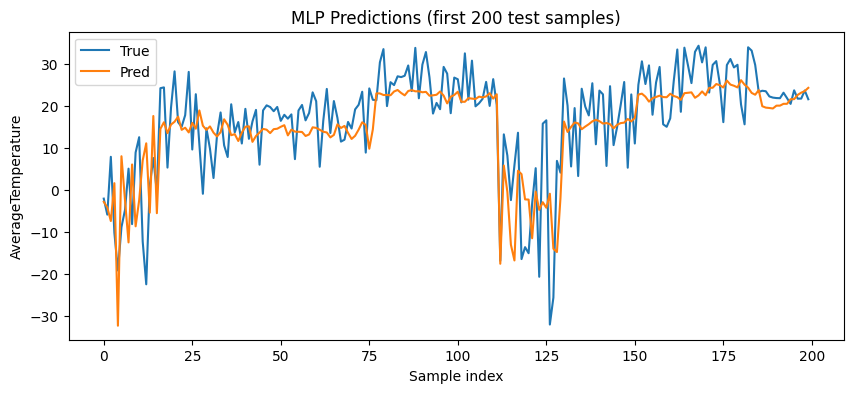

Done with this model. Uncomment other models to run them individually.


In [ ]:
# -------------------------- Main experiment (Colab-friendly, sample 50k rows) ------------------
if __name__ == "__main__":
    if not Path(CSV_PATH).exists():
        raise FileNotFoundError(f"CSV file not found at {CSV_PATH}")

    df_full, FEATURE_COLS = load_prepare(CSV_PATH)
    print(f"Full dataset loaded: {len(df_full)} rows. Features: {FEATURE_COLS}")

    # Sample 50,000 rows randomly for quick execution
    SAMPLE_SIZE = 10000
    df = df_full.sample(n=SAMPLE_SIZE, random_state=SEED).reset_index(drop=True)
    print(f"Using sample dataset of {len(df)} rows for quick run.")

    # Split by states to reduce leakage (80/20)
    states = df['StateEnc'].unique()
    random.shuffle(states.tolist())
    split = int(0.8 * len(states))
    train_states = set(states[:split])
    test_states = set(states[split:])
    train_df = df[df['StateEnc'].isin(train_states)].reset_index(drop=True)
    test_df = df[df['StateEnc'].isin(test_states)].reset_index(drop=True)

    # Create datasets and loaders
    train_ds = ClimateSeqDataset(train_df, FEATURE_COLS, seq_len=SEQ_LENGTH, target_mode=TARGET_MODE)
    test_ds = ClimateSeqDataset(test_df, FEATURE_COLS, seq_len=SEQ_LENGTH, target_mode=TARGET_MODE)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

    if TARGET_MODE == "regression":
        y_mean, y_std = build_target_scaler(train_ds)
    else:
        y_mean, y_std = 0.0, 1.0

    print(f"Train samples: {len(train_ds)}, Test samples: {len(test_ds)}")

    # -------------------------- Run models individually --------------------------
    # Example for MLP
    # 1) MLP
    mlp_model, mlp_metrics = run_training(
        kind="mlp",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std,
        mc_dropout=False
    )

    #2) LSTM
    lstm_model, lstm_metrics = run_training(
        kind="lstm",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std
    )

    #3) GRU
    gru_model, gru_metrics = run_training(
        kind="gru",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std
    )

    #4) CNN1D
    cnn_model, cnn_metrics = run_training(
        kind="cnn1d",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std
    )

    #5) Transformer
    trans_model, trans_metrics = run_training(
        kind="transformer",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std
    )

    #6) TCN
    tcn_model, tcn_metrics = run_training(
        kind="tcn",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std
    )

    #7) MC Dropout (MLP)
    mc_model, mc_metrics = run_training(
        kind="mlp",
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        epochs=EPOCHS,
        y_mean=y_mean,
        y_std=y_std,
        mc_dropout=True
    )

    #8) Deep Ensemble (MLP)
    ensemble, ens_metrics = train_ensemble(
        kind="mlp",
        n_models=NUM_ENSEMBLE,
        train_loader=train_loader,
        test_loader=test_loader,
        target_mode=TARGET_MODE,
        y_mean=y_mean,
        y_std=y_std
    )

    # Similarly you can uncomment and run GRU, CNN1D, Transformer, TCN individually

    # -------------------------- Quick plot for regression ------------------------
    if TARGET_MODE == "regression":
        res = evaluate(mlp_model, test_loader, device=DEVICE, target_mode="regression", y_mean=y_mean, y_std=y_std)
        preds = res["preds"][:200]
        ys = res["ys"][:200]
        plt.figure(figsize=(10,4))
        plt.plot(ys, label="True")
        plt.plot(preds, label="Pred")
        plt.title("MLP Predictions (first 200 test samples)")
        plt.xlabel("Sample index")
        plt.ylabel("AverageTemperature")
        plt.legend()
        plt.show()

    print("Done with this model. Uncomment other models to run them individually.")

In [1]:
# Cell 1: imports & user params
# pip install -U scikit-learn pandas matplotlib seaborn

import time
import os
import random
from pathlib import Path
from typing import List, Tuple, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone as sklearn_clone

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# ---------- USER PARAMETERS (tweak these) ----------
CSV_PATH = "/content/GlobalLandTemperaturesByState.csv"  # change for Colab
TEST_SIZE = 0.2
RISK_WATCH_Q = 0.65
RISK_WARN_Q = 0.85
CV_FOLDS = 5

# Speed / demo settings
FAST_MODE = True            # if True -> faster settings (useful for Colab demo)
SAMPLE_SIZE: Optional[int] = 50000 if FAST_MODE else None  # sample rows for quick runs (None => full data)

# Ensemble sizes (smaller when FAST_MODE=True)
RF_EST = 150 if FAST_MODE else 300
ET_EST = 150 if FAST_MODE else 300
GB_EST = 100 if FAST_MODE else 200
# ---------------------------------------------------


In [2]:
# Cell 2: load + preprocess
def load_and_preprocess(csv_path: str) -> Tuple[pd.DataFrame, List[str]]:
    df = pd.read_csv(csv_path)
    # required cols: dt, AverageTemperature, AverageTemperatureUncertainty, State, Country
    df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
    df = df.dropna(subset=['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State', 'Country'])
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month

    # State-month climatology baseline
    climat = df.groupby(['State','month'])['AverageTemperature'].mean().rename('StateMonthMean').reset_index()
    df = df.merge(climat, on=['State','month'], how='left')

    # fallback: global monthly mean
    df['StateMonthMean'] = df['StateMonthMean'].fillna(df.groupby('month')['AverageTemperature'].transform('mean'))

    # anomalies and uncertainty-aware anomaly
    df['anom'] = df['AverageTemperature'] - df['StateMonthMean']
    df['u_anom'] = df['anom'] - df['AverageTemperatureUncertainty']

    # risk tiers (classification target)
    tau_watch = df['u_anom'].quantile(RISK_WATCH_Q)
    tau_warn  = df['u_anom'].quantile(RISK_WARN_Q)
    def tier(u):
        if u >= tau_warn: return 2
        if u >= tau_watch: return 1
        return 0
    df['risk'] = df['u_anom'].apply(tier)

    # cyclical month features
    df['month_sin'] = np.sin(2*np.pi*df['month']/12)
    df['month_cos'] = np.cos(2*np.pi*df['month']/12)

    # normalized year
    ymin, ymax = df['year'].min(), df['year'].max()
    df['year_norm'] = (df['year'] - ymin) / max(1, (ymax - ymin))

    # encode categorical features (State & Country)
    le_state = LabelEncoder()
    le_country = LabelEncoder()
    df['StateEnc'] = le_state.fit_transform(df['State'].astype(str))
    df['CountryEnc'] = le_country.fit_transform(df['Country'].astype(str))

    # feature list
    features = [
        'AverageTemperature', 'AverageTemperatureUncertainty', 'anom', 'u_anom',
        'month_sin', 'month_cos', 'year_norm', 'StateEnc', 'CountryEnc'
    ]

    # drop rows with nan in features or target
    df = df.dropna(subset=features + ['risk']).reset_index(drop=True)
    return df, features

# quick check
if not Path(CSV_PATH).exists():
    raise FileNotFoundError(f"CSV not found at {CSV_PATH} — upload to Colab files or change path.")
print("CSV found. Ready.")


CSV found. Ready.


In [3]:
# Cell 3: sample, compute sample weights, train/test split, scale
def compute_sample_weights(df: pd.DataFrame, eps: float = 1e-6) -> np.ndarray:
    u = df['AverageTemperatureUncertainty'].astype(float).values
    w = 1.0 / (u**2 + eps)
    w = w / np.mean(w)
    return w

# load & possibly sample
print("Loading and preprocessing (may take a moment)...")
t0 = time.time()
df_all, FEATURE_COLS = load_and_preprocess(CSV_PATH)
print(f"After preprocess: {len(df_all)} rows")

if SAMPLE_SIZE is not None and SAMPLE_SIZE < len(df_all):
    df = df_all.sample(n=SAMPLE_SIZE, random_state=RANDOM_SEED).reset_index(drop=True)
    print(f"Sampling {SAMPLE_SIZE} rows for a faster demo.")
else:
    df = df_all
print("Using rows:", len(df))
print("Features:", FEATURE_COLS)

# compute sample weights
sample_weights = compute_sample_weights(df)

# Prepare X, y
X = df[FEATURE_COLS].values
y = df['risk'].values

# stratified split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, sample_weights, test_size=TEST_SIZE, random_state=RANDOM_SEED, stratify=y
)

# scale numeric features (fit on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(f"Split done. Train: {X_train_scaled.shape[0]}, Test: {X_test_scaled.shape[0]} (time {time.time()-t0:.1f}s)")


Loading and preprocessing (may take a moment)...
After preprocess: 105248 rows
Sampling 50000 rows for a faster demo.
Using rows: 50000
Features: ['AverageTemperature', 'AverageTemperatureUncertainty', 'anom', 'u_anom', 'month_sin', 'month_cos', 'year_norm', 'StateEnc', 'CountryEnc']
Split done. Train: 40000, Test: 10000 (time 0.4s)


In [4]:
# Cell 4: helpers for stacking/blending plus evaluation
def clone_estimator(est):
    return sklearn_clone(est)

def build_oof_meta_features(estimators: List[Tuple[str, object]],
                            X: np.ndarray, y: np.ndarray,
                            cv: int = CV_FOLDS, random_state: int = RANDOM_SEED):
    """
    Build out-of-fold probability features for estimators (only for classifiers with predict_proba).
    Returns: meta_feats (n_samples, n_estimators * n_classes), trained_base_models (list)
    """
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    n_samples = X.shape[0]
    classes = np.unique(y)
    n_classes = len(classes)
    meta_feats = np.zeros((n_samples, len(estimators) * n_classes), dtype=float)

    trained = []
    for i, (name, est) in enumerate(estimators):
        oof = np.zeros((n_samples, n_classes), dtype=float)
        for train_idx, valid_idx in skf.split(X, y):
            e = clone_estimator(est)
            # some estimators accept sample_weight in fit; we skip sample_weight for OOF building for speed
            e.fit(X[train_idx], y[train_idx])
            if hasattr(e, "predict_proba"):
                proba = e.predict_proba(X[valid_idx])
            else:
                # fall back to one-hot of predict
                pred = e.predict(X[valid_idx])
                proba = np.zeros((len(pred), n_classes))
                for k, cls in enumerate(classes):
                    proba[:, k] = (pred == cls).astype(float)
            oof[valid_idx] = proba
        meta_feats[:, i*n_classes:(i+1)*n_classes] = oof
    # fit each estimator on full train data for test-time predictions
    for name, est in estimators:
        e = clone_estimator(est)
        e.fit(X, y)
        trained.append((name, e))
    return meta_feats, trained

def blending_train(base_estimators, meta_estimator, X_train, y_train, w_train,
                   holdout_frac=0.2, random_state=RANDOM_SEED):
    X_tr, X_meta, y_tr, y_meta, w_tr, w_meta = train_test_split(
        X_train, y_train, w_train, test_size=holdout_frac, stratify=y_train, random_state=random_state
    )
    trained = []
    meta_features = []
    for name, est in base_estimators:
        e = clone_estimator(est)
        # if estimator supports sample_weight, pass it; else proceed
        try:
            e.fit(X_tr, y_tr, sample_weight=w_tr)
        except TypeError:
            e.fit(X_tr, y_tr)
        trained.append((name, e))
        # get meta features as predict_proba (or fallback)
        if hasattr(e, "predict_proba"):
            meta_features.append(e.predict_proba(X_meta))
        else:
            pred = e.predict(X_meta)
            # one-hot
            classes = np.unique(y_train)
            proba = np.zeros((len(pred), len(classes)))
            for k, cls in enumerate(classes):
                proba[:, k] = (pred == cls).astype(float)
            meta_features.append(proba)
    meta_X = np.hstack(meta_features)
    meta = clone_estimator(meta_estimator)
    try:
        meta.fit(meta_X, y_meta, sample_weight=w_meta)
    except TypeError:
        meta.fit(meta_X, y_meta)
    return trained, meta, X_meta, y_meta

def evaluate_model(clf, X_tr, y_tr, w_tr, X_te, y_te, show_confusion=True):
    """If clf is not fitted, try to fit with sample weights; return summary dict without printing large arrays."""
    # fit if necessary
    is_fitted = False
    try:
        getattr(clf, "predict_proba")
        is_fitted = True
    except Exception:
        is_fitted = False

    try:
        y_pred = clf.predict(X_te)
    except Exception:
        # try fitting
        try:
            clf.fit(X_tr, y_tr, sample_weight=w_tr)
        except TypeError:
            clf.fit(X_tr, y_tr)
        y_pred = clf.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred, average='macro')
    print(f"Acc: {acc:.4f} | Macro-F1: {f1:.4f}")
    print(classification_report(y_te, y_pred, zero_division=0))
    if show_confusion:
        cm = confusion_matrix(y_te, y_pred)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title("Confusion matrix")
        plt.xlabel("Pred")
        plt.ylabel("True")
        plt.show()
    return {'accuracy': acc, 'f1_macro': f1}


In [5]:
# Cell 5: define base learners (fast-mode tuned)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=RF_EST, random_state=RANDOM_SEED, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=GB_EST, random_state=RANDOM_SEED)),
    ('et', ExtraTreesClassifier(n_estimators=ET_EST, random_state=RANDOM_SEED, n_jobs=-1)),
    ('knn', KNeighborsClassifier(n_neighbors=8)),
    ('svc', SVC(probability=True, kernel='rbf', C=1.0, random_state=RANDOM_SEED)),
    ('nb', GaussianNB())
]

stack_estimators = [
    ('rf', RandomForestClassifier(n_estimators=min(100, RF_EST), random_state=RANDOM_SEED)),
    ('gb', GradientBoostingClassifier(n_estimators=min(100, GB_EST), random_state=RANDOM_SEED)),
    ('knn', KNeighborsClassifier(n_neighbors=8))
]

voting_clf = VotingClassifier(estimators=base_learners, voting='soft', n_jobs=-1)
meta_clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_SEED)
stack_clf = StackingClassifier(estimators=stack_estimators, final_estimator=meta_clf, cv=CV_FOLDS, passthrough=False, n_jobs=-1)


Train/test sizes: (40000, 9) (10000, 9)
Class distribution (train): [25912  8124  5964]
Class distribution (test): [6478 2031 1491]

--- Random Forest (baseline, sample-weighted) ---
Trained RF in 4.1s
Acc: 1.0000 | Macro-F1: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6478
           1       1.00      1.00      1.00      2031
           2       1.00      1.00      1.00      1491

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



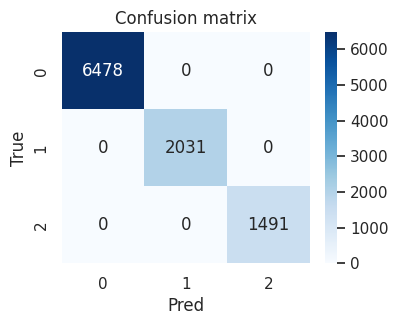


--- Soft Voting Ensemble ---
Trained Voting in 73.4s
Acc: 0.9987 | Macro-F1: 0.9983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6478
           1       1.00      1.00      1.00      2031
           2       1.00      1.00      1.00      1491

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



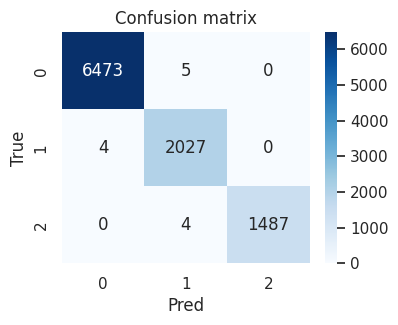


--- StackingClassifier (sklearn) ---
Trained Stacking in 89.8s
Acc: 1.0000 | Macro-F1: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6478
           1       1.00      1.00      1.00      2031
           2       1.00      1.00      1.00      1491

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



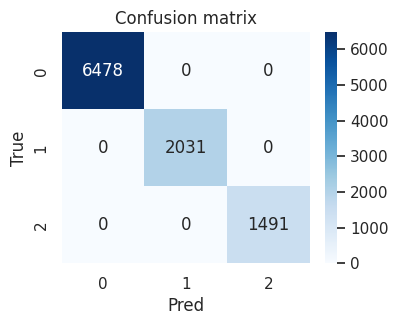


--- Weighted Stacking (OOF meta-features) ---
Weighted stacking evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6478
           1       1.00      1.00      1.00      2031
           2       1.00      1.00      1.00      1491

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



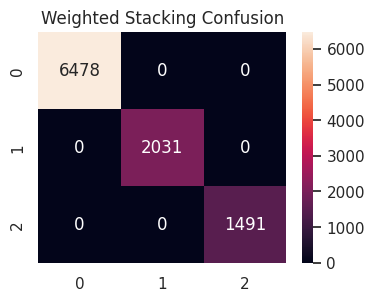

Weighted stacking finished in 132.7s

--- Blending (holdout) ---
Blending evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6478
           1       1.00      1.00      1.00      2031
           2       1.00      1.00      1.00      1491

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



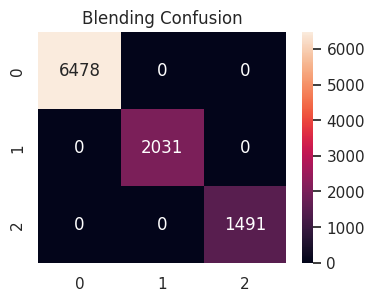

Blending finished in 20.4s

--- Cross-validated macro-F1 comparison ---
RF CV macro-F1 (may take a while): 0.9999
GB CV macro-F1 (may take a while): 0.9999
Voting CV macro-F1 (may take a while): 0.9978
Stacking CV macro-F1 (may take a while): 0.9999

All done. Review the printed classification reports & confusion matrices to choose best model.


In [6]:
# Cell 6: main experiments (fast-mode friendly). Run this cell to execute experiments.
if __name__ == "__main__":
    print("Train/test sizes:", X_train_scaled.shape, X_test_scaled.shape)
    print("Class distribution (train):", np.bincount(y_train))
    print("Class distribution (test):", np.bincount(y_test))

    # 1) Random Forest baseline (sample-weighted)
    print("\n--- Random Forest (baseline, sample-weighted) ---")
    t0 = time.time()
    rf = RandomForestClassifier(n_estimators=RF_EST if not FAST_MODE else RF_EST, random_state=RANDOM_SEED, n_jobs=-1)
    try:
        rf.fit(X_train_scaled, y_train, sample_weight=w_train)
    except TypeError:
        rf.fit(X_train_scaled, y_train)
    print(f"Trained RF in {time.time()-t0:.1f}s")
    rf_res = evaluate_model(rf, X_train_scaled, y_train, w_train, X_test_scaled, y_test)

    # 2) Soft Voting
    print("\n--- Soft Voting Ensemble ---")
    t0 = time.time()
    try:
        voting_clf.fit(X_train_scaled, y_train, sample_weight=w_train)
    except TypeError:
        voting_clf.fit(X_train_scaled, y_train)
    print(f"Trained Voting in {time.time()-t0:.1f}s")
    voting_res = evaluate_model(voting_clf, X_train_scaled, y_train, w_train, X_test_scaled, y_test)

    # 3) StackingClassifier (vanilla sklearn)
    print("\n--- StackingClassifier (sklearn) ---")
    t0 = time.time()
    stack_clf.fit(X_train_scaled, y_train)
    print(f"Trained Stacking in {time.time()-t0:.1f}s")
    stack_res = evaluate_model(stack_clf, X_train_scaled, y_train, w_train, X_test_scaled, y_test)

    # 4) Weighted stacking via OOF meta-features (custom)
    print("\n--- Weighted Stacking (OOF meta-features) ---")
    t0 = time.time()
    weighted_bases = [
        ('rf', RandomForestClassifier(n_estimators=min(150, RF_EST), random_state=RANDOM_SEED)),
        ('gb', GradientBoostingClassifier(n_estimators=min(150, GB_EST), random_state=RANDOM_SEED)),
        ('et', ExtraTreesClassifier(n_estimators=min(150, ET_EST), random_state=RANDOM_SEED))
    ]
    meta_X_tr, trained_bases = build_oof_meta_features(weighted_bases, X_train_scaled, y_train, cv=CV_FOLDS)
    meta_clf_w = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    try:
        meta_clf_w.fit(meta_X_tr, y_train, sample_weight=w_train)
    except TypeError:
        meta_clf_w.fit(meta_X_tr, y_train)
    # test meta features
    meta_X_test = np.hstack([m.predict_proba(X_test_scaled) if hasattr(m, "predict_proba") else np.eye(len(np.unique(y_train)))[m.predict(X_test_scaled)] for (_, m) in trained_bases])
    y_meta_pred = meta_clf_w.predict(meta_X_test)
    print("Weighted stacking evaluation:")
    print(classification_report(y_test, y_meta_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_meta_pred)
    plt.figure(figsize=(4,3)); sns.heatmap(cm, annot=True, fmt='d'); plt.title("Weighted Stacking Confusion"); plt.show()
    print(f"Weighted stacking finished in {time.time()-t0:.1f}s")

    # 5) Blending (holdout)
    print("\n--- Blending (holdout) ---")
    t0 = time.time()
    base_for_blend = [
        ('rf', RandomForestClassifier(n_estimators=min(200, RF_EST), random_state=RANDOM_SEED)),
        ('gb', GradientBoostingClassifier(n_estimators=min(200, GB_EST), random_state=RANDOM_SEED)),
        ('knn', KNeighborsClassifier(n_neighbors=8))
    ]
    meta_base = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    trained_bases_blend, meta_blend, X_meta_hold, y_meta_hold = blending_train(base_for_blend, meta_base,
                                                                               X_train_scaled, y_train, w_train,
                                                                               holdout_frac=0.2)
    meta_test_feats = np.hstack([m.predict_proba(X_test_scaled) if hasattr(m,"predict_proba") else np.eye(len(np.unique(y_train)))[m.predict(X_test_scaled)] for (_, m) in trained_bases_blend])
    y_blend_pred = meta_blend.predict(meta_test_feats)
    print("Blending evaluation:")
    print(classification_report(y_test, y_blend_pred, zero_division=0))
    plt.figure(figsize=(4,3)); sns.heatmap(confusion_matrix(y_test, y_blend_pred), annot=True, fmt='d'); plt.title("Blending Confusion"); plt.show()
    print(f"Blending finished in {time.time()-t0:.1f}s")

    # 6) CV macro-F1 comparison
    print("\n--- Cross-validated macro-F1 comparison ---")
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_SEED)
    def cv_score(estimator, X, y):
        return cross_val_score(estimator, X, y, cv=cv, scoring='f1_macro', n_jobs=-1).mean()
    models_for_cv = {
        'RF': RandomForestClassifier(n_estimators=min(200, RF_EST), random_state=RANDOM_SEED),
        'GB': GradientBoostingClassifier(n_estimators=min(200, GB_EST), random_state=RANDOM_SEED),
        'Voting': VotingClassifier(estimators=base_learners, voting='soft', n_jobs=-1),
        'Stacking': StackingClassifier(estimators=stack_estimators, final_estimator=LogisticRegression(max_iter=1000), cv=CV_FOLDS, n_jobs=-1)
    }
    for name, m in models_for_cv.items():
        print(f"{name} CV macro-F1 (may take a while): ", end='', flush=True)
        try:
            s = cv_score(m, X_train_scaled, y_train)
            print(f"{s:.4f}")
        except Exception as e:
            print("ERROR during CV:", e)

    print("\nAll done. Review the printed classification reports & confusion matrices to choose best model.")
